# Introduction

In this project, I will act as a data visualization developer at Yahoo Finance! I will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, I will only visualize data for the year of 2017. Specifically, I will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, I will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.

After completing your visualizations, I'll be creating a presentation to share the images with the rest of the Netflix Stock Profile team.

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Step 1

Let's get our notebook ready for visualizing by importing the modules that we'll be using in this project.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

Let's load the datasets and inspect them.

Note: In the Yahoo Data, `Adj Close` represents the adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day.

In [2]:
netflix_stocks = pd.read_csv('NFLX.csv')
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800



Note: You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 


In [3]:
dowjones_stocks = pd.read_csv('DJI.csv')
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


dowjones_stocks = pd.read_csv('DJI.csv')
dowjones_stocks.head()


In [4]:
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Step 3

Let's learn more about our data and answer some questions.
 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 
 

What year is represented in the data?

In [5]:
# 2017

+ Is the data represented by days, weeks, or months? 
+ In which ways are the files different? 
+ What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [6]:
# netflix_stocks and dowjones_stocks are represented by months.
# netflix_stocks_quarterly is represented by days and also have another column to represent stock quarterly.

## Step 4

The first two column names of netflix_stocks are one word each, and the only one that is not is `Adj Close`! 

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Using Pandas we'll change the name of the column `Adj Close` to `Price` so that it is easier to work with the data.

We'll do this for the Dow Jones and Netflix Quarterly pandas dataframes as well.


In [7]:
netflix_stocks.rename(columns={'Adj Close': 'Price'}, inplace=True)
dowjones_stocks.rename(columns={'Adj Close': 'Price'}, inplace=True)
netflix_stocks_quarterly.rename(columns={'Adj Close': 'Price'}, inplace=True)


In [8]:
netflix_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [9]:
dowjones_stocks.head()
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Price,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1




## Step 5

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter!


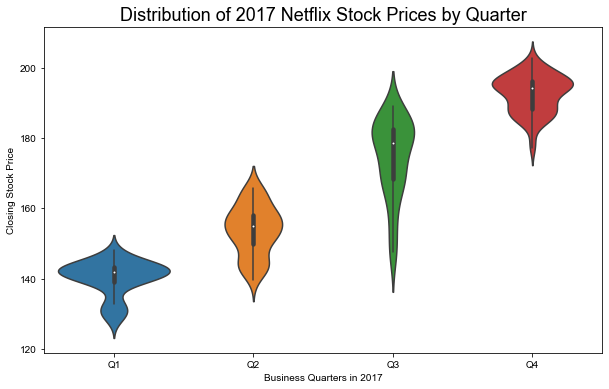

In [10]:
plt.subplots(figsize=(10, 6))
sns.set_style('darkgrid')
ax = sns.violinplot(data=netflix_stocks_quarterly, x='Quarter', y='Price')
sns.set_context('talk')
ax.set_title('Distribution of 2017 Netflix Stock Prices by Quarter')
ax.set_ylabel('Closing Stock Price')
ax.set_xlabel('Business Quarters in 2017')
plt.savefig('netflix_QDist.png')
plt.show()


## Graph Literacy
- What are your first impressions looking at the visualized data?

- In what range(s) did most of the prices fall throughout the year?

- What were the highest and lowest prices? 

In [11]:
# The graph shows constant and rather rapid increase of prices throughout the year. 
# The whole annual range of prices is about 125-205, with the range of 125-155 for the 1st quarter to 170-205 for the 4th quarter.
# Also the most important point of this plot is that in Q3 prices fluctuate the most and price range is from  as low as 135 to 200  USD. 


## Step 6

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 


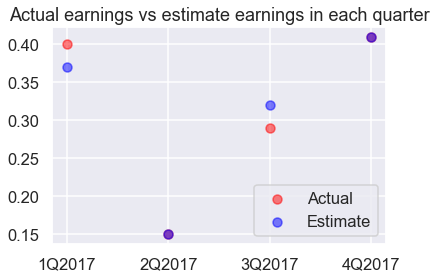

In [12]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

plt.scatter(x_positions, earnings_actual, color='red', alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)
plt.legend(['Actual', 'Estimate'])
plt.xticks(x_positions, chart_labels)
plt.title('Actual earnings vs estimate earnings in each quarter')
plt.savefig('Actual_estimate_earning.png')
plt.show()


## Graph Literacy

+ What do the purple dots tell us about the actual and estimate earnings per share in this graph? Hint: In color theory red and blue mix to make purple.


In [13]:
# In this Graph the purple dots ( mix of blue and red) shows that for the 2nd and the 4th quarters of 2017 
# the actual earnings per share coincided with the estimated ones.

## Step 7

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. 


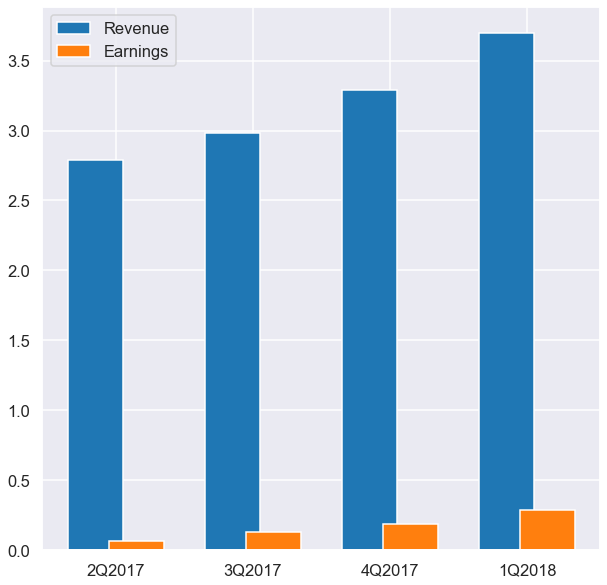

In [14]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]
plt.figure(figsize=(10, 10))
# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.6 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars1_x, revenue_by_quarter)


# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.6 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars2_x, earnings_by_quarter)




middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]
plt.legend(labels)
plt.xticks(middle_x, quarter_labels)
plt.savefig('revenue_vs_earning.png')
plt.show()

## Graph Literacy
What are your first impressions looking at the visualized data?

- Does Revenue follow a trend?
- Do Earnings follow a trend?
- Roughly, what percentage of the revenue constitutes earnings?

In [15]:
# Revenue and Earnings both have a quarterly growth trend
# Roughly less than %10 of the revenue constituted earnings.

## Step 8

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 


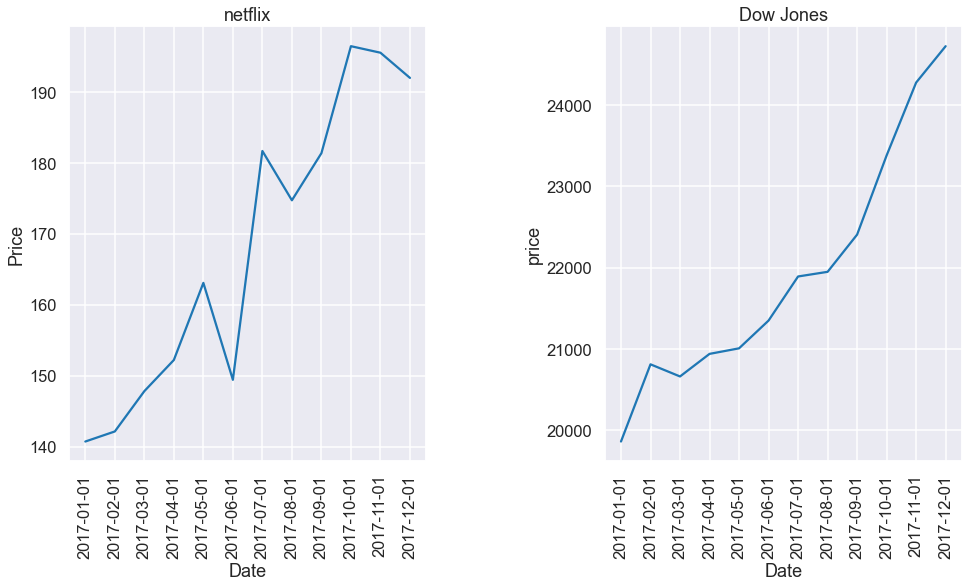

In [16]:
# Left plot Netflix
plt.figure(figsize=(16, 8))
ax1 = plt.subplot(1, 2, 1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
ax1.set_title('netflix')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_xticks(netflix_stocks['Date'])
ax1.set_xticklabels(netflix_stocks['Date'], rotation='vertical')



# Right plot Dow Jones
ax2 = plt.subplot(1, 2, 2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax2.set_title('Dow Jones')
ax2.set_xlabel('Date')
ax2.set_ylabel('price')
ax2.set_xticks(dowjones_stocks['Date'])
ax2.set_xticklabels(dowjones_stocks['Date'], rotation='vertical')


plt.subplots_adjust(wspace=0.5)
plt.savefig('compare_netflix_dowjones.png')
plt.show()


- How did Netflix perform relative to Dow Jones Industrial Average in 2017?
- Which was more volatile?
- How do the prices of the stocks compare?

In [17]:
# The overall trend for the stock price of Netflix in 2017 reflects the one of Dow Jones Average in the same period. 
# The dynamics for Netflix, though, are more volatile, with a sharp decrease in the middle of the year followed by a 
# sharp growth, and with the final decrease at the end of the year.
# The price of the Dow Jones Industrial Average index is significantly higher than Netflix stock prices.
